In [1]:
import pickle
import numpy as np
from scipy.stats import sem, iqr
import matplotlib.pyplot as plt

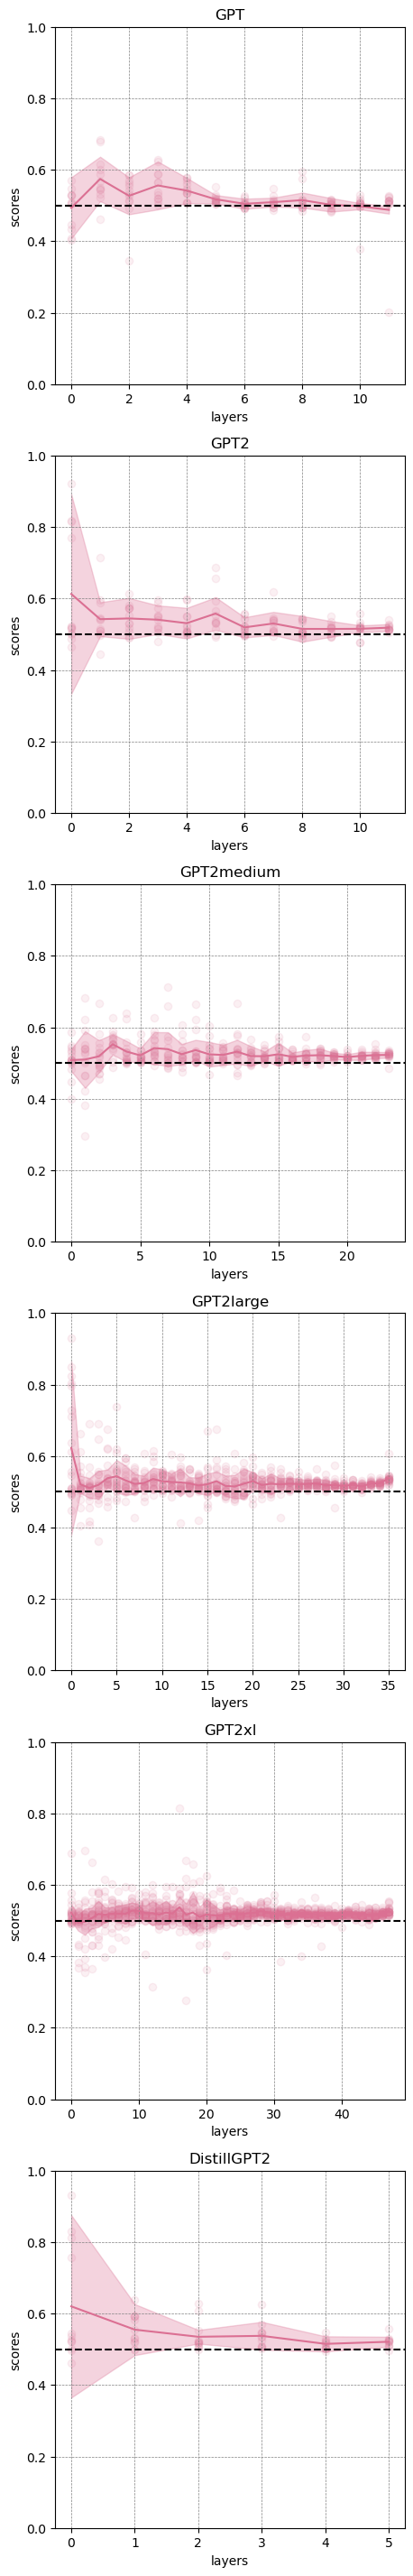

In [2]:
# get query-key scores for GPT models calculated on each head
with open('../../_data/fig_scores/GPT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)

names = list(models.keys())

plt.figure(figsize=(5,6 * len(names)))

for i, name in enumerate(names):
    
    plt.subplot(len(names),1,i+1)

    model = models[name][-2]**2

    plt.plot(np.arange(model.shape[0]),np.mean(model,axis=1),color='palevioletred')
    plt.fill_between(np.arange(model.shape[0]),
                 np.mean(model,axis=1)+ iqr(model,axis=1),
                 np.mean(model,axis=1)- iqr(model,axis=1),
                 color='palevioletred',alpha=.3)
    
    for layer in range(model.shape[0]):
        plt.scatter(layer*np.ones(model.shape[1]),model[layer,:],color='palevioletred',alpha=.1)

    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.title(name)
    plt.ylabel('scores')
    plt.xlabel('layers')
    plt.ylim(0,1)
    plt.axhline(y=.5,color='k',linestyle='dashed')
